In [1]:
# setup absolute path to location of package Starts and config-file 
from inspect import getsourcefile
import os.path as path, sys
current_dir = path.dirname(path.abspath(getsourcefile(lambda:0)))
sys.path.insert(0, current_dir[:current_dir.rfind(path.sep)])

# import package Starts
from Starts.startvis import *
from Starts.startmodskl import *
from Starts.startvis import *
%matplotlib inline

local_kwargs {'data_path': './data/italy_earthquakes_from_2016-08-24_to_2016-11-30.csv, ./data/clustered_italy_earthquakes_from_2016-08-24_to_2016-11-30.csv', 'drop_obj_col': False, 'nan_drop_col': False, 'nan_drop_row': False, 'nan_zero': False, 'nan_mean': True, 'nan_mean_neighbors': False}


In [2]:
train_data = data[0]
StartML.summary(train_data)


Data Columns: Index(['Time', 'Latitude', 'Longitude', 'Depth/Km', 'Magnitude'], dtype='object') 

Missing values in Data: 
Time         0
Latitude     0
Longitude    0
Depth/Km     0
Magnitude    0
dtype: int64 

data.head(10): 
                      Time  Latitude  Longitude  Depth/Km  Magnitude
0  2016-08-24 03:36:32.000   42.6983    13.2335       8.1        6.0
1  2016-08-24 03:37:26.580   42.7123    13.2533       9.0        4.5
2  2016-08-24 03:40:46.590   42.7647    13.1723       9.7        3.8
3  2016-08-24 03:41:38.900   42.7803    13.1683       9.7        3.9
4  2016-08-24 03:42:07.170   42.7798    13.1575       9.7        3.6
5  2016-08-24 03:43:58.700   42.7298    13.2137      10.7        3.4
6  2016-08-24 03:44:38.660   42.6760    13.2858      10.8        2.7
7  2016-08-24 03:44:56.400   42.6282    13.2648      10.6        3.2
8  2016-08-24 03:46:12.240   42.7645    13.1777       6.6        3.7
9  2016-08-24 03:46:46.000   42.7445    13.2097      12.4        2.8 

<class 'p

Plot function ...


/usr/lib64/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/lib64/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/usr/lib64/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/usr/lib64/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()


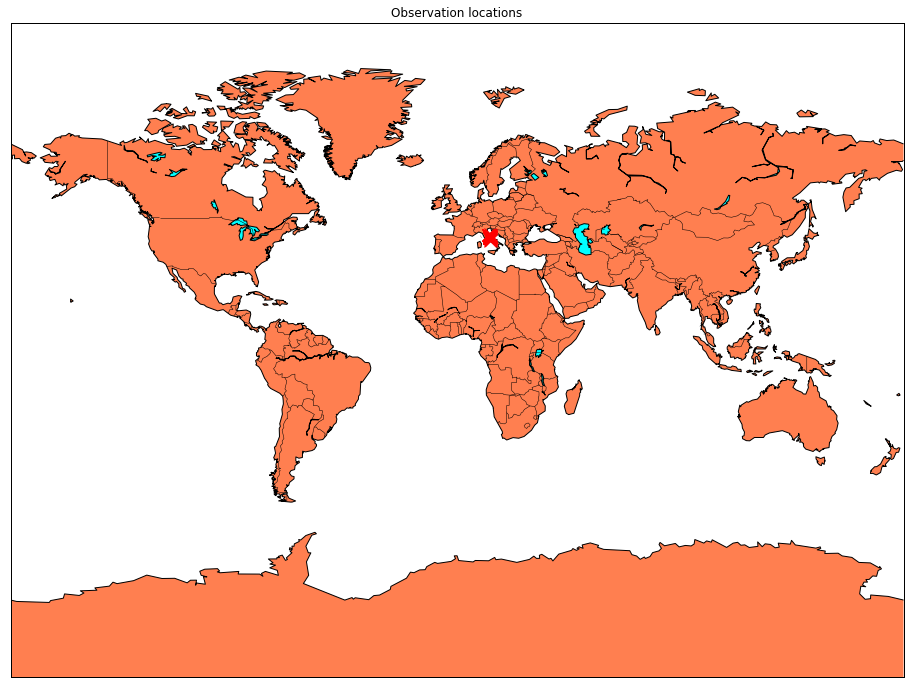

In [3]:
StartVis.vis_basemap(train_data, plot=True)

In [4]:
train_data.head()

,Time,Latitude,Longitude,Depth/Km,Magnitude
0,2016-08-24 03:36:32.000,42.6983,13.2335,8.1,6.0
1,2016-08-24 03:37:26.580,42.7123,13.2533,9.0,4.5
2,2016-08-24 03:40:46.590,42.7647,13.1723,9.7,3.8
3,2016-08-24 03:41:38.900,42.7803,13.1683,9.7,3.9
4,2016-08-24 03:42:07.170,42.7798,13.1575,9.7,3.6


In [5]:
non_obj_label, obj_label = StartMod.feature_columns(train_data)
non_obj_label, obj_label

(['Latitude', 'Longitude', 'Depth/Km', 'Magnitude'], ['Time'])

In [6]:
train_data.head()

,Time,Latitude,Longitude,Depth/Km,Magnitude
0,2016-08-24 03:36:32.000,42.6983,13.2335,8.1,6.0
1,2016-08-24 03:37:26.580,42.7123,13.2533,9.0,4.5
2,2016-08-24 03:40:46.590,42.7647,13.1723,9.7,3.8
3,2016-08-24 03:41:38.900,42.7803,13.1683,9.7,3.9
4,2016-08-24 03:42:07.170,42.7798,13.1575,9.7,3.6


In [7]:
train_data = StartMod.convert_time_series(train_data, 'Time')

In [8]:
train_data.head()

,Latitude,Longitude,Depth/Km,Magnitude
Time,,,,
2016-08-24 03:36:32.000,42.6983,13.2335,8.1,6.0
2016-08-24 03:37:26.580,42.7123,13.2533,9.0,4.5
2016-08-24 03:40:46.590,42.7647,13.1723,9.7,3.8
2016-08-24 03:41:38.900,42.7803,13.1683,9.7,3.9
2016-08-24 03:42:07.170,42.7798,13.1575,9.7,3.6


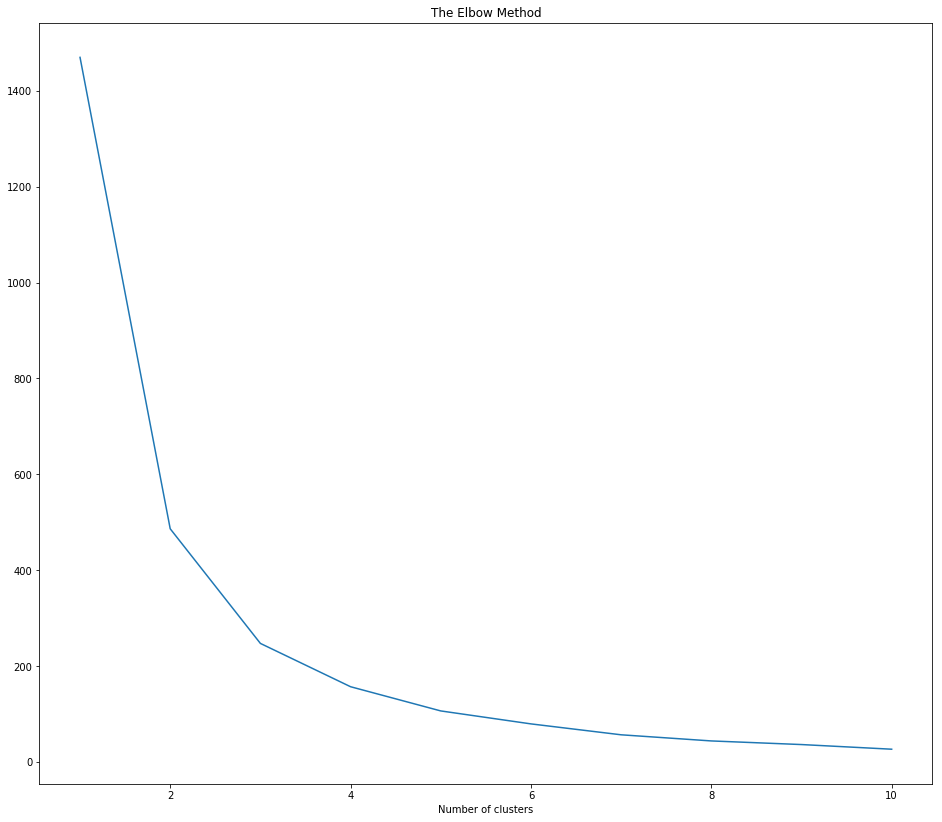

,cluster_errors,num_clusters
0,1469.858452,1
1,486.425817,2
2,247.288790,3
3,156.934020,4
4,106.453008,5
5,79.407683,6
6,56.657623,7
7,43.854180,8
8,36.301043,9
9,26.595893,10


In [9]:
# apply clustering technique to split dataset by magnitude into 3 classes 
StartModSKL.clustering_k_mean_noc(train_data[['Magnitude']], plot=True)

In [10]:
k_means, y_clusters = StartModSKL.clustering_k_mean(train_data[['Magnitude']], noc=4)
k_means, y_clusters

(KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=0, tol=0.0001, verbose=0),
 array([3, 3, 3, ..., 0, 1, 2], dtype=int32))

In [11]:
train_data[['Magnitude']].head()

,Magnitude
Time,
2016-08-24 03:36:32.000,6.0
2016-08-24 03:37:26.580,4.5
2016-08-24 03:40:46.590,3.8
2016-08-24 03:41:38.900,3.9
2016-08-24 03:42:07.170,3.6


/usr/lib64/python3.6/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/lib64/python3.6/site-packages/pandas/core/indexing.py:601: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


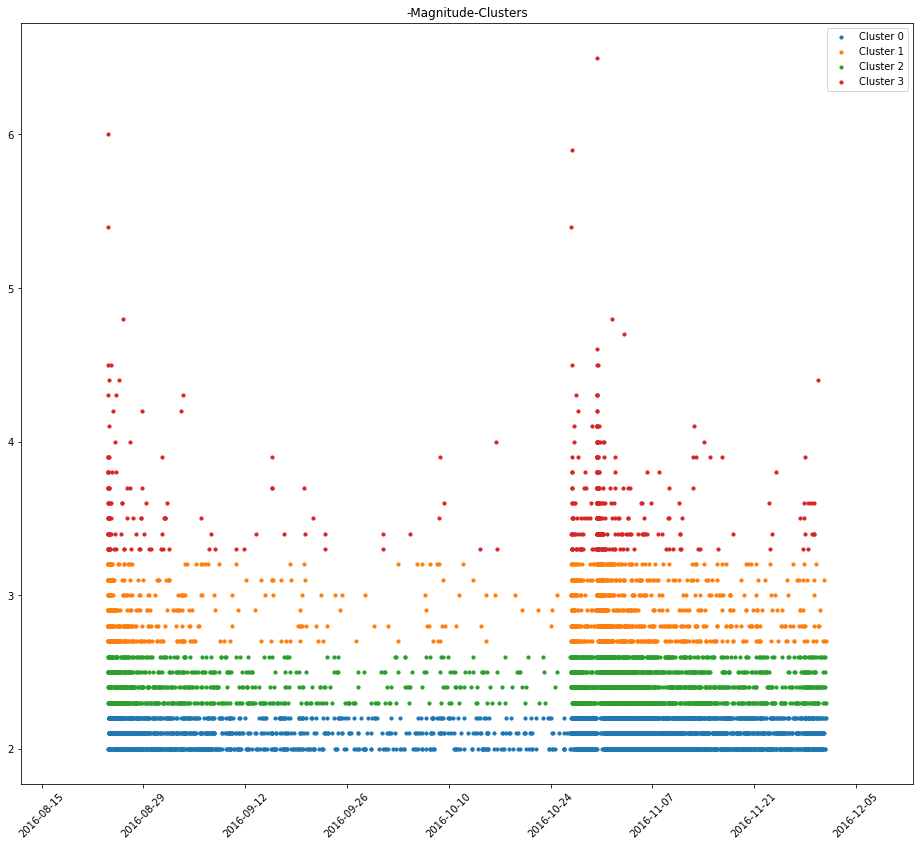

In [12]:
StartVis.vis_clustering(train_data[['Magnitude']], y_clusters=y_clusters, ts=True)

In [13]:
# label = {'SOS':3, 'Alarm':2, 'Warning':1, 'Caution':0}
len(y_clusters)

8086

In [14]:
train_data.loc[:, 'Clusters'] = y_clusters
train_data.head()

,Latitude,Longitude,Depth/Km,Magnitude,Clusters
Time,,,,,
2016-08-24 03:36:32.000,42.6983,13.2335,8.1,6.0,3
2016-08-24 03:37:26.580,42.7123,13.2533,9.0,4.5,3
2016-08-24 03:40:46.590,42.7647,13.1723,9.7,3.8,3
2016-08-24 03:41:38.900,42.7803,13.1683,9.7,3.9,3
2016-08-24 03:42:07.170,42.7798,13.1575,9.7,3.6,3


In [16]:
train_data.to_csv('./data/clustered_italy_earthquakes_from_2016-08-24_to_2016-11-30.csv', index=True)